In [3]:
import random
import numpy as np
# Pandas used for loading and manipulating .csv files
import pandas as pd
# plotting using matplotlib
import matplotlib.pyplot as plt
# seaborn for fancy plotting (builds on top of matplotlib)
import seaborn as sn
sn.set()
from IPython.display import display

In [4]:
# Create list of different question entries:
questions = ['carry_big_objects_tables_chairs_etc__in_the_direction_of_the_arrow', \
             'carry_big_objects_tables_chairs_etc_within_the_circle', \
             'carry_cold_food_in_the_direction_of_the_arrow',\
             'carry_cold_food_within_the_circle',\
             'carry_drinks_in_the_direction_of_the_arrow',\
             'carry_drinks_within_the_circle',\
             'carry_small_objects_plates_toys_etc__in_the_direction_of_the_arrow',\
             'carry_small_objects_plates_toys_etc_within_the_circle',\
             'carry_warm_food_in_the_direction_of_the_arrow',\
             'carry_warm_food_within_the_circle',\
             'cleaning_picking_up_stuff_within_the_circle',\
             'mopping_the_floor_in_the_direction_of_the_arrow',\
             'mopping_the_floor_within_the_circle',\
             'starting_conversation_in_the_direction_of_the_arrow',\
             'vacuum_cleaning_in_the_direction_of_the_arrow',\
             'vacuum_cleaning_within_the_circle']

questions_all = ['carry_big_objects_tables_chairs_etc__in_the_direction_of_the_arrow', \
             'carry_big_objects_tables_chairs_etc_within_the_circle', \
             'carry_cold_food_in_the_direction_of_the_arrow',\
             'carry_cold_food_within_the_circle',\
             'carry_drinks_in_the_direction_of_the_arrow',\
             'carry_drinks_within_the_circle',\
             'carry_small_objects_plates_toys_etc__in_the_direction_of_the_arrow',\
             'carry_small_objects_plates_toys_etc_within_the_circle',\
             'carry_warm_food_in_the_direction_of_the_arrow',\
             'carry_warm_food_within_the_circle',\
             'cleaning_picking_up_stuff_within_the_circle',\
             'mopping_the_floor_in_the_direction_of_the_arrow',\
             'mopping_the_floor_within_the_circle',\
             'starting_conversation_in_the_direction_of_the_arrow',\
             'vacuum_cleaning_in_the_direction_of_the_arrow',\
             'vacuum_cleaning_within_the_circle', \
             'carry_big_objects_tables_chairs_etc__in_the_direction_of_the_arrow:variance', \
             'carry_big_objects_tables_chairs_etc_within_the_circle:variance', \
             'carry_cold_food_in_the_direction_of_the_arrow:variance',\
             'carry_cold_food_within_the_circle:variance',\
             'carry_drinks_in_the_direction_of_the_arrow:variance',\
             'carry_drinks_within_the_circle:variance',\
             'carry_small_objects_plates_toys_etc__in_the_direction_of_the_arrow:variance',\
             'carry_small_objects_plates_toys_etc_within_the_circle:variance',\
             'carry_warm_food_in_the_direction_of_the_arrow:variance',\
             'carry_warm_food_within_the_circle:variance',\
             'cleaning_picking_up_stuff_within_the_circle:variance',\
             'mopping_the_floor_in_the_direction_of_the_arrow:variance',\
             'mopping_the_floor_within_the_circle:variance',\
             'starting_conversation_in_the_direction_of_the_arrow:variance',\
             'vacuum_cleaning_in_the_direction_of_the_arrow:variance',\
             'vacuum_cleaning_within_the_circle:variance']


In [5]:
!ls

aggregated.csv        distributions.py      images3.csv
cleaned_step1.csv     full_report.csv       labels.csv
cleaning.ipynb        image_urls.py         learning.ipynb
data.csv              images.csv            text.ipynb
data_for_moddeling.py images2.csv


In [6]:
# Load CSV file contents using pandas and convert to a numpy array 
df_full = pd.read_csv('full_report.csv')
pd.options.display.max_columns = None
#display(df_full)

# Aggregated version
df_agg = pd.read_csv('aggregated.csv')
#display(df_agg)


/Users/jonastjomsland/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (114,122,123,144,175) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


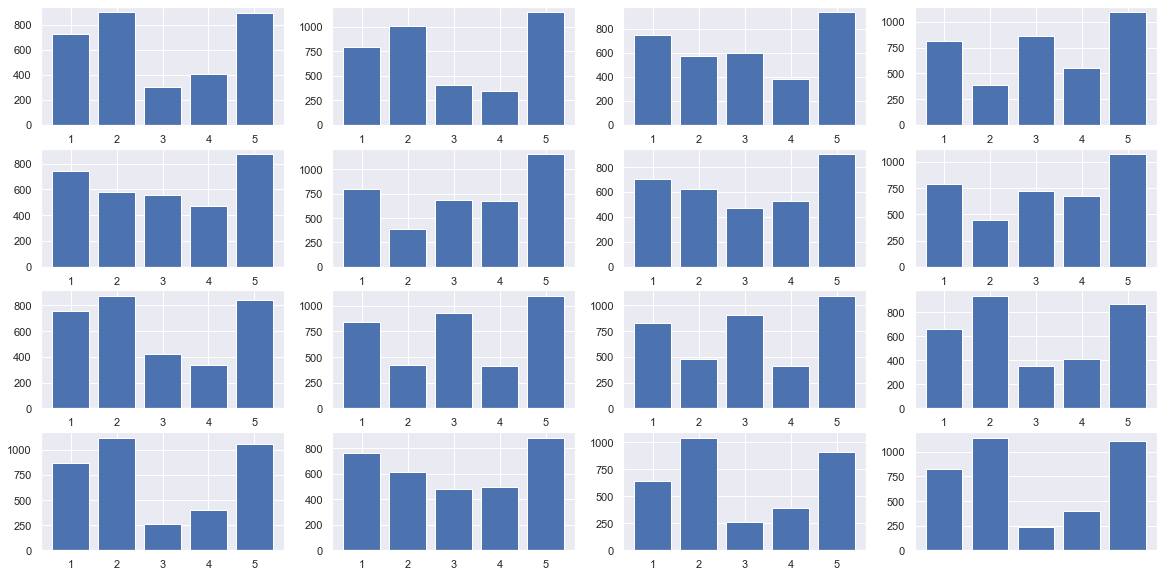

In [41]:
# Create a matrix answer count:
answers = np.zeros((len(questions), 5))
q_nr = 0
for question in questions:
    temp = df_full[question]
    temp = temp.dropna()
    for answer in temp:
        answers[q_nr, int(answer)-1] += 1
    q_nr += 1

x = np.arange(1, 6, 1)
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = [20,10])
i = 0
axes = fig.gca()
axes.set_xticks([])
for row in ax:
    for col in row:
        col.bar(x, answers[i])
        i += 1




In [4]:
# Remove NaN columns,(give a reason)
df_agg_cleaned = df_agg.dropna(axis='columns')
# Remove remaining "give a reason" questions:
remove_questions = ['a_give_a_reason_to_your_answer', \
             'b_give_a_reason_to_your_answer_above_mopping_arrow', \
             'c_give_a_reason_to_your_answer_above_mopping_arrow',\
             'd_give_a_reason_to_your_answer_above_mopping_arrow',\
             'e_give_a_reason_to_your_answer_above_mopping_arrow',\
             'f_give_a_reason_to_your_answer_above_mopping_arrow',\
             'g_give_a_reason_to_your_answer_above_mopping_arrow',\
             'h_give_a_reason_to_your_answer_above_mopping_arrow',\
             'are_there_animals_in_the_scene',\
             'are_there_animals_in_the_scene:confidence',\
             'are_there_children_in_the_scene',\
             'are_there_children_in_the_scene:confidence',\
             'posrot1',\
             'posrot2',\
             'posrot3',\
             'posrot4',\
             'posrot5',\
             'posrot6',\
             'posrot7',\
             'posrot8',\
             'posrot9',\
             'posrot10',\
             'posrot11',\
             'posrotpepper',\
             'file_path',\
             'image_url']   

for question in remove_questions:
    try:
        df_agg_cleaned = df_agg_cleaned.drop(question, 1)
    except:
        continue
    
# Remove duplicate rows:
df_agg_cleaned.drop_duplicates(subset ="stamp",keep = False, inplace = True) 


In [5]:
df_agg_cleaned.to_csv('cleaned_step1.csv', encoding='utf-8', index=False)

In [6]:
display(df_agg_cleaned)

,id,carry_big_objects_tables_chairs_etc__in_the_direction_of_the_arrow,carry_big_objects_tables_chairs_etc__in_the_direction_of_the_arrow:variance,carry_big_objects_tables_chairs_etc_within_the_circle,carry_big_objects_tables_chairs_etc_within_the_circle:variance,carry_cold_food_in_the_direction_of_the_arrow,carry_cold_food_in_the_direction_of_the_arrow:variance,carry_cold_food_within_the_circle,carry_cold_food_within_the_circle:variance,carry_drinks_in_the_direction_of_the_arrow,carry_drinks_in_the_direction_of_the_arrow:variance,carry_drinks_within_the_circle,carry_drinks_within_the_circle:variance,carry_small_objects_plates_toys_etc__in_the_direction_of_the_arrow,carry_small_objects_plates_toys_etc__in_the_direction_of_the_arrow:variance,carry_small_objects_plates_toys_etc_within_the_circle,carry_small_objects_plates_toys_etc_within_the_circle:variance,carry_warm_food_in_the_direction_of_the_arrow,carry_warm_food_in_the_direction_of_the_arrow:variance,carry_warm_food_within_the_circle,carry_warm_food_within_the_circle:variance,cleaning_picking_up_stuff_within_the_circle,cleaning_picking_up_stuff_within_the_circle:variance,mopping_the_floor_in_the_direction_of_the_arrow,mopping_the_floor_in_the_direction_of_the_arrow:variance,mopping_the_floor_within_the_circle,mopping_the_floor_within_the_circle:variance,starting_conversation_in_the_direction_of_the_arrow,starting_conversation_in_the_direction_of_the_arrow:variance,vacuum_cleaning_in_the_direction_of_the_arrow,vacuum_cleaning_in_the_direction_of_the_arrow:variance,vacuum_cleaning_within_the_circle,vacuum_cleaning_within_the_circle:variance,2nd_closest_human_facing_robot,3d_closest_human_facing_robot,closest_human_facing_robot,direction_from_closest_human_to_robot,direction_to_2nd_closest_human,direction_to_3rd_closest_human,direction_to_closest_human,distance_to_2nd_closest_human,distance_to_3rd_closest_human,distance_to_closest_animal,distance_to_closest_child,distance_to_closest_human,distance_to_group,group_radius,music_playing,number_of_agents_in_scene,number_of_animals,number_of_children,number_of_people,number_of_people_in_group,number_of_people_sittinglaying_in_sofa,robot_facing_2nd_closest_human,robot_facing_3rd_closest_human,robot_facing_closest_human,robot_facing_group,robot_within_group,robot_work_radius,stamp,using_arrow,using_circle
0,2633639406,3.27,1.181,0.00,0.000,3.73,1.181,0.00,0.000,3.47,1.204,0.00,0.000,3.40,1.083,0.00,0.000,3.73,1.236,0.00,0.000,0.00,0.000,3.13,1.310,0.00,0.000,3.47,1.147,3.07,1.340,0.0,0.000,0,0,0,141.43740,112.93060,58.32041,90.43741,1.382456,1.524118,50.000000,50.000000,0.942421,50.000000,50.000000,0,7,0,0,6,0,0,0,0,0,0,0,0.000000,0,1,0
1,2633639407,3.22,1.227,0.00,0.000,3.11,1.487,0.00,0.000,3.06,1.353,0.00,0.000,3.11,1.242,0.00,0.000,3.17,1.213,0.00,0.000,0.00,0.000,3.00,1.491,0.00,0.000,3.06,1.393,3.00,1.291,0.0,0.000,0,0,0,269.80180,310.67380,312.66960,358.87120,1.404158,2.766870,50.000000,3.872036,1.126082,50.000000,50.000000,0,6,0,2,5,0,0,0,0,1,0,0,0.000000,1,1,0
2,2633639408,3.53,1.543,0.00,0.000,3.73,1.389,0.00,0.000,3.40,1.541,0.00,0.000,3.53,1.454,0.00,0.000,3.60,1.451,0.00,0.000,0.00,0.000,3.80,1.376,0.00,0.000,3.60,1.665,3.60,1.405,0.0,0.000,0,0,1,354.77020,181.97050,163.42300,65.96844,4.929128,4.981411,50.000000,0.902266,0.902266,50.000000,50.000000,0,5,0,1,4,0,0,0,0,0,0,0,0.000000,2,1,0
3,2633639409,3.58,1.311,0.00,0.000,3.47,1.534,0.00,0.000,3.53,1.272,0.00,0.000,3.58,1.228,0.00,0.000,3.37,1.494,0.00,0.000,0.00,0.000,3.26,1.551,0.00,0.000,3.63,1.306,3.32,1.416,0.0,0.000,0,0,0,155.39680,23.68878,337.43020,350.24530,1.184608,1.473818,50.000000,50.000000,0.856872,1.392087,0.566521,0,7,0,0,6,5,0,1,1,1,1,0,0.000000,3,1,0
4,2633639410,0.00,0.000,3.47,1.147,0.00,0.000,3.40,1.143,0.00,0.000,3.53,1.258,0.00,0.000,3.47,1.204,0.00,0.000,3.40,1.143,3.53,1.147,0.00,0.000,3.40,1.306,0.00,0.000,0.00,0.000,3.6,1.200,0,1,0,124.77250,145.98410,10.26584,198.19090,0.593512,4.445046,50.000000,50.000000,0.555838,50.000000,50.000000,0,5,0,0,

In [16]:
# Create the label set: (only mean now, no variance)
# Remove everythhing but answers:
df_labels = df_agg_cleaned
for (columnName, columnData) in df_agg_cleaned.iteritems():
    if not columnName in questions:
        df_labels = df_labels.drop(columnName, 1)
display(df_labels)
df_labels.to_csv('labels.csv', encoding='utf-8', index=False)

,carry_big_objects_tables_chairs_etc__in_the_direction_of_the_arrow,carry_big_objects_tables_chairs_etc_within_the_circle,carry_cold_food_in_the_direction_of_the_arrow,carry_cold_food_within_the_circle,carry_drinks_in_the_direction_of_the_arrow,carry_drinks_within_the_circle,carry_small_objects_plates_toys_etc__in_the_direction_of_the_arrow,carry_small_objects_plates_toys_etc_within_the_circle,carry_warm_food_in_the_direction_of_the_arrow,carry_warm_food_within_the_circle,cleaning_picking_up_stuff_within_the_circle,mopping_the_floor_in_the_direction_of_the_arrow,mopping_the_floor_within_the_circle,starting_conversation_in_the_direction_of_the_arrow,vacuum_cleaning_in_the_direction_of_the_arrow,vacuum_cleaning_within_the_circle
0,3.27,0.00,3.73,0.00,3.47,0.00,3.40,0.00,3.73,0.00,0.00,3.13,0.00,3.47,3.07,0.0
1,3.22,0.00,3.11,0.00,3.06,0.00,3.11,0.00,3.17,0.00,0.00,3.00,0.00,3.06,3.00,0.0
2,3.53,0.00,3.73,0.00,3.40,0.00,3.53,0.00,3.60,0.00,0.00,3.80,0.00,3.60,3.60,0.0
3,3.58,0.00,3.47,0.00,3.53,0.00,3.58,0.00,3.37,0.00,0.00,3.26,0.00,3.63,3.32,0.0
4,0.00,3.47,0.00,3.40,0.00,3.53,0.00,3.47,0.00,3.40,3.53,0.00,3.40,0.00,0.00,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2.80,0.00,2.53,0.00,2.67,0.00,2.53,0.00,2.73,0.00,0.00,2.87,0.00,2.60,3.00,0.0
262,2.73,0.00,2.80,0.00,2.87,0.00,2.73,0.00,2.87,0.00,0.00,2.67,0.00,2.87,2.73,0.0
263,2.73,0.00,2.80,0.00,2.80,0.00,2.80,0.00,2.73,0.00,0.00,2.73,0.00,2.73,2.73,0.0
264,0.00,2.93,0.00,2.53,0.00,2.60,0.00,2.40,0.00,2.33,2.07,0.00,2.13,0.00,0.00,2.4


In [17]:
# Now create data matrix:
df_data = df_agg_cleaned
for (columnName, columnData) in df_agg_cleaned.iteritems():
    if columnName in questions_all:
        df_data = df_data.drop(columnName, 1)
df_data = df_data.drop('id', 1)
df_data = df_data.drop('stamp', 1)
df_data = df_data.drop('using_circle', 1)
df_data = df_data.drop('using_arrow', 1)
display(df_data)
df_data.to_csv('data.csv', encoding='utf-8', index=False)

,2nd_closest_human_facing_robot,3d_closest_human_facing_robot,closest_human_facing_robot,direction_from_closest_human_to_robot,direction_to_2nd_closest_human,direction_to_3rd_closest_human,direction_to_closest_human,distance_to_2nd_closest_human,distance_to_3rd_closest_human,distance_to_closest_animal,distance_to_closest_child,distance_to_closest_human,distance_to_group,group_radius,music_playing,number_of_agents_in_scene,number_of_animals,number_of_children,number_of_people,number_of_people_in_group,number_of_people_sittinglaying_in_sofa,robot_facing_2nd_closest_human,robot_facing_3rd_closest_human,robot_facing_closest_human,robot_facing_group,robot_within_group,robot_work_radius
0,0,0,0,141.43740,112.93060,58.32041,90.43741,1.382456,1.524118,50.000000,50.000000,0.942421,50.000000,50.000000,0,7,0,0,6,0,0,0,0,0,0,0,0.000000
1,0,0,0,269.80180,310.67380,312.66960,358.87120,1.404158,2.766870,50.000000,3.872036,1.126082,50.000000,50.000000,0,6,0,2,5,0,0,0,0,1,0,0,0.000000
2,0,0,1,354.77020,181.97050,163.42300,65.96844,4.929128,4.981411,50.000000,0.902266,0.902266,50.000000,50.000000,0,5,0,1,4,0,0,0,0,0,0,0,0.000000
3,0,0,0,155.39680,23.68878,337.43020,350.24530,1.184608,1.473818,50.000000,50.000000,0.856872,1.392087,0.566521,0,7,0,0,6,5,0,1,1,1,1,0,0.000000
4,0,1,0,124.77250,145.98410,10.26584,198.19090,0.593512,4.445046,50.000000,50.000000,0.555838,50.000000,50.000000,0,5,0,0,4,0,0,0,1,0,0,0,2.810554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,118.43810,236.10400,37.73552,178.43810,1.333033,2.267295,50.000000,50.000000,0.796413,50.000000,50.000000,0,6,0,0,5,0,1,0,1,0,0,1,0.000000
262,1,0,0,266.56150,133.69570,32.40375,134.45750,1.841142,2.058078,0.940736,1.841142,0.888188,50.000000,50.000000,0,10,1,2,8,0,0,0,1,0,0,1,0.000000
263,0,0,1,13.22385,339.99360,324.41080,273.42410,2.988490,3.603231,50.000000,3.603231,2.667877,50.000000,50.000000,0,4,0,1,3,0,0,1,1,0,0,1,0.000000
264,0,0,1,25.03459,272.00130,193.84860,160.82410,2.498928,3.284162,50.000000,50.000000,2.204135,50.000000,50.000000,0,5,0,0,4,0,0,0,0,0,0,1,2.718603


In [7]:
#gk = df_full.groupby('_unit_id') 
#display(gk.first()) 
#a = gk.get_group(2635825733)

#for question in questions:
#    print("Square root of three times std: ", np.sqrt(a[question].std()*3))
#    print("Difference between mean and mode: ", np.abs(a[question].mode()-a[question].mean()))
